In [135]:
# Importing libraries

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import os
from datetime import datetime

In [136]:
# Load the data

In [137]:
# Properties data
df_property = pd.read_csv("./datasets/property_data_set.csv")

# Photo data
df_photos = pd.read_csv("./datasets/property_photos.tsv", sep='\t')

# Interaction timestamps data
df_interactions = pd.read_csv("./datasets/property_interactions.csv")

In [138]:
# Lets check property data
df_property.head()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type
0,ff808081469fd6e20146a5af948000ea,BHK2,09-03-2017 14:36,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,...,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP
1,ff8080814702d3d10147068359d200cd,BHK2,07-03-2017 12:02,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,...,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP
2,ff808081470c645401470fb03f5800a6,BHK2,10-03-2017 13:43,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,...,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP
3,ff808081470c6454014715eaa5960281,BHK3,09-03-2017 22:16,2,3,4.0,SEMI_FURNISHED,0,12.888169,77.591282,...,0,Arakere,BOTH,1,1300,0,560076.0,17000,150000,AP
4,ff808081474aa867014771a0298f0aa6,BHK1,15-03-2017 18:29,1,1,2.0,SEMI_FURNISHED,0,12.990243,77.712962,...,0,Hoodi,BOTH,4,450,0,560048.0,6500,40000,IF


In [139]:
len(df_property)

28888

In [140]:
df_property['property_id'].nunique()

28888

In [141]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28888 entries, 0 to 28887
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_id      28888 non-null  object 
 1   type             28888 non-null  object 
 2   activation_date  28888 non-null  object 
 3   bathroom         28888 non-null  int64  
 4   floor            28888 non-null  int64  
 5   total_floor      28845 non-null  float64
 6   furnishing       28888 non-null  object 
 7   gym              28888 non-null  int64  
 8   latitude         28888 non-null  float64
 9   longitude        28888 non-null  float64
 10  lease_type       28888 non-null  object 
 11  lift             28888 non-null  int64  
 12  locality         28888 non-null  object 
 13  parking          28888 non-null  object 
 14  property_age     28888 non-null  int64  
 15  property_size    28888 non-null  int64  
 16  swimming_pool    28888 non-null  int64  
 17  pin_code    

In [142]:
cat_cols = [x for x in df_property.columns if df_property[x].dtype == 'object']
cat_cols.remove('property_id')
print(cat_cols)

['type', 'activation_date', 'furnishing', 'lease_type', 'locality', 'parking', 'building_type']


In [143]:
for i in cat_cols:
    print("*"*50)
    print(i)
    print("*"*50)
    print(df_property[i].value_counts())
    print('\n\n')

**************************************************
type
**************************************************
type
BHK2        14071
BHK1         6565
BHK3         5725
RK1          2015
BHK4          440
BHK4PLUS       72
Name: count, dtype: int64



**************************************************
activation_date
**************************************************
activation_date
02-03-2017 19:23    35
29-03-2017 20:27    31
06-03-2017 15:52    29
11-03-2017 18:06    27
03-03-2017 16:55    27
                    ..
03-02-2017 19:52     1
28-03-2017 15:26     1
04-02-2017 10:22     1
03-02-2017 22:26     1
30-03-2017 22:33     1
Name: count, Length: 18534, dtype: int64



**************************************************
furnishing
**************************************************
furnishing
SEMI_FURNISHED     22463
NOT_FURNISHED       4863
FULLY_FURNISHED     1562
Name: count, dtype: int64



**************************************************
lease_type
******************************

In [144]:
df_photos.head()

,property_id,photo_urls
0,ff808081469fd6e20146a5af948000ea,"[{\title\"":\""Balcony\"",\""name\"":\""IMG_20131006..."
1,ff8080814702d3d10147068359d200cd,NaN
2,ff808081470c645401470fb03f5800a6,"[{\title\"":\""Bedroom\"",\""name\"":\""ff808081470c..."
3,ff808081470c6454014715eaa5960281,"[{\title\"":\""Bedroom\"",\""name\"":\""Screenshot_7..."
4,ff808081474aa867014771a0298f0aa6,"[{\title\"":\""Other\"",\""name\"":\""ff808081474aa8..."


In [145]:
df_interactions.head()

,property_id,request_date
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22
3,ff808081469fd6e20146a5af948000ea,2017-03-11 17:48:46
4,ff8080814702d3d10147068359d200cd,2017-03-30 19:59:15


 Counting number of photos for each property id

In [148]:
import re
def count_photos(row):
    if type(row) == str:
        return row.count('_original.jpg')
    else:
        return 0

df_photos["count"] = df_photos["photo_urls"].apply(count_photos ) 

In [149]:
df_photos

,property_id,photo_urls,count
0,ff808081469fd6e20146a5af948000ea,"[{\title\"":\""Balcony\"",\""name\"":\""IMG_20131006...",7
1,ff8080814702d3d10147068359d200cd,NaN,0
2,ff808081470c645401470fb03f5800a6,"[{\title\"":\""Bedroom\"",\""name\"":\""ff808081470c...",12
3,ff808081470c6454014715eaa5960281,"[{\title\"":\""Bedroom\"",\""name\"":\""Screenshot_7...",9
4,ff808081474aa867014771a0298f0aa6,"[{\title\"":\""Other\"",\""name\"":\""ff808081474aa8...",7
...,...,...,...
28883,ff8081815b1fdda8015b1fe675ae0146,NaN,0
28884,ff8081815b1fdda8015b1ffee8a305d2,"[{\title\"":\""\"",\""name\"":\""files[]\"",\""imagesM...",7
28885,ff8081815b1fdda8015b2000369205fd,"[{\title\"":\""\"",\""name\"":\""files[]\"",\""imagesM...",6
28886,ff8081815b200540015b20158b0103c9,NaN,0


In [150]:
df_photos["count"].sum()

99993

In [151]:
#df_photos.iloc[[18167,13362,23864,9575,10496]]
#print(df_photos.iloc[10496]['photo_urls'])

In [152]:
df_interactions.head()

,property_id,request_date
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22
3,ff808081469fd6e20146a5af948000ea,2017-03-11 17:48:46
4,ff8080814702d3d10147068359d200cd,2017-03-30 19:59:15


Counting number of interactions in 5 days and 7 days

In [161]:
df_interactions['property_id'].nunique()

22779

In [153]:
# Transforming request data and activation date as date column
df_interactions['request_date'] = pd.to_datetime(df_interactions['request_date'])

df_property['activation_date'] = pd.to_datetime(df_property['activation_date'],format="%d-%m-%Y %H:%M")



In [154]:
df_interactions_comb = pd.merge(left=df_interactions, right=df_property, left_on='property_id', right_on='property_id',how='left')

In [155]:
df_interactions_comb= df_interactions_comb[['property_id','activation_date','request_date']]

In [156]:
df_interactions_comb['diff'] = df_interactions_comb['request_date']-df_interactions_comb['activation_date']

In [157]:
df_interactions_comb['diff_days']=df_interactions_comb['diff'].dt.days

<Axes: >

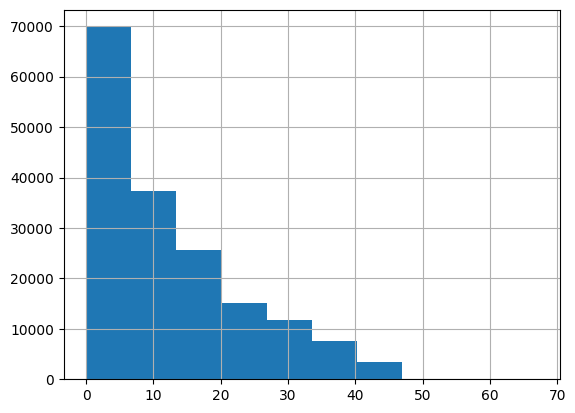

In [158]:
df_interactions_comb['diff_days'].hist()

In [159]:
df_interactions_comb['3_days']= df_interactions_comb['diff_days'].apply(lambda x: 1 if x<4 else 0)
df_interactions_comb['7_days']= df_interactions_comb['diff_days'].apply(lambda x: 1 if x<7 else 0)
df_interactions_comb['12_days']= df_interactions_comb['diff_days'].apply(lambda x: 1 if x<13 else 0)

In [84]:
df_combined = df_interactions_comb.groupby(['property_id']).agg({'3_days':'sum','7_days':'sum','12_days':'sum', 'diff_days':'mean'})
df_combined.rename(columns={'diff_days':'avg_int'},inplace=True)

In [85]:
df_combined.head()

,3_days,7_days,12_days,avg_int
property_id,,,,
ff808081469fd6e20146a5af948000ea,4,4,4,1.000000
ff8080814702d3d10147068359d200cd,4,5,8,11.250000
ff808081470c645401470fb03f5800a6,18,22,27,2.888889
ff808081470c6454014715eaa5960281,5,7,10,10.461538
ff808081474aa867014771a0298f0aa6,34,52,68,3.955882


In [160]:
len(df_combined)

22779

In [179]:
df_final = pd.merge(left=df_property, right = df_combined,left_on='property_id',right_on='property_id',how='left')
df_final = pd.merge(left=df_final, right=df_photos, left_on='property_id',right_on='property_id',how='left')

In [180]:
df_final.drop(['photo_urls'],inplace=True,axis=1)

In [181]:
df_final.head()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,swimming_pool,pin_code,rent,deposit,building_type,3_days,7_days,12_days,avg_int,count
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:00,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,...,1,560076.0,12000,120000,AP,4.0,4.0,4.0,1.000000,7
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:00,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,...,1,560016.0,20000,150000,AP,4.0,5.0,8.0,11.250000,0
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:00,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,...,0,560075.0,15000,75000,AP,18.0,22.0,27.0,2.888889,12
3,ff808081470c6454014715eaa5960281,BHK3,2017-03-09 22:16:00,2,3,4.0,SEMI_FURNISHED,0,12.888169,77.591282,...,0,560076.0,17000,150000,AP,5.0,7.0,10.0,10.461538,9
4,ff808081474aa867014771a0298f0aa6,BHK1,2017-03-15 18:29:00,1,1,2.0,SEMI_FURNISHED,0,12.990243,77.712962,...,0,560048.0,6500,40000,IF,34.0,52.0,68.0,3.955882,7


In [182]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28888 entries, 0 to 28887
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   property_id      28888 non-null  object        
 1   type             28888 non-null  object        
 2   activation_date  28888 non-null  datetime64[ns]
 3   bathroom         28888 non-null  int64         
 4   floor            28888 non-null  int64         
 5   total_floor      28845 non-null  float64       
 6   furnishing       28888 non-null  object        
 7   gym              28888 non-null  int64         
 8   latitude         28888 non-null  float64       
 9   longitude        28888 non-null  float64       
 10  lease_type       28888 non-null  object        
 11  lift             28888 non-null  int64         
 12  locality         28888 non-null  object        
 13  parking          28888 non-null  object        
 14  property_age     28888 non-null  int64

In [183]:
df_final.drop(columns=['property_id', 'activation_date' ,'latitude', 'longitude', 'pin_code','locality' ],inplace=True)

In [184]:
print(len(df_final.columns))

20


In [185]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28888 entries, 0 to 28887
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           28888 non-null  object 
 1   bathroom       28888 non-null  int64  
 2   floor          28888 non-null  int64  
 3   total_floor    28845 non-null  float64
 4   furnishing     28888 non-null  object 
 5   gym            28888 non-null  int64  
 6   lease_type     28888 non-null  object 
 7   lift           28888 non-null  int64  
 8   parking        28888 non-null  object 
 9   property_age   28888 non-null  int64  
 10  property_size  28888 non-null  int64  
 11  swimming_pool  28888 non-null  int64  
 12  rent           28888 non-null  int64  
 13  deposit        28888 non-null  int64  
 14  building_type  28809 non-null  object 
 15  3_days         22779 non-null  float64
 16  7_days         22779 non-null  float64
 17  12_days        22779 non-null  float64
 18  avg_in

In [186]:
cat_cols = []
num_cols = []
dis_cols = []
for i in df_final.columns:
    if df_final[i].dtype == 'object':
        cat_cols.append(i)
    elif df_final[i].nunique() < 5:
        dis_cols.append(i)
    else:
        num_cols.append(i)

print(f"{cat_cols=}")
print()

print(f"{num_cols=}")
print()

print(f"{dis_cols=}")
print()

print(len(num_cols+dis_cols+cat_cols))

cat_cols=['type', 'furnishing', 'lease_type', 'parking', 'building_type']

num_cols=['bathroom', 'floor', 'total_floor', 'property_age', 'property_size', 'rent', 'deposit', '3_days', '7_days', '12_days', 'avg_int', 'count']

dis_cols=['gym', 'lift', 'swimming_pool']

20


In [187]:
df_final['type'].nunique()

6

In [188]:
for i in dis_cols + cat_cols:
    print("*" * 50)
    print(f"Column : {i}")
    print("*" * 50)

    print(df_final[i].value_counts())
    print('\n\n')

**************************************************
Column : gym
**************************************************
gym
0    24094
1     4794
Name: count, dtype: int64



**************************************************
Column : lift
**************************************************
lift
0    20828
1     8060
Name: count, dtype: int64



**************************************************
Column : swimming_pool
**************************************************
swimming_pool
0    24769
1     4119
Name: count, dtype: int64



**************************************************
Column : type
**************************************************
type
BHK2        14071
BHK1         6565
BHK3         5725
RK1          2015
BHK4          440
BHK4PLUS       72
Name: count, dtype: int64



**************************************************
Column : furnishing
**************************************************
furnishing
SEMI_FURNISHED     22463
NOT_FURNISHED       4863
FULLY_FURNISHED     1562
Na

In [198]:
df_final[['3_days',	'7_days',	'12_days',	'avg_int']]= df_final[['3_days',	'7_days',	'12_days',	'avg_int']].fillna(0)

In [ ]:
# Handling outliers

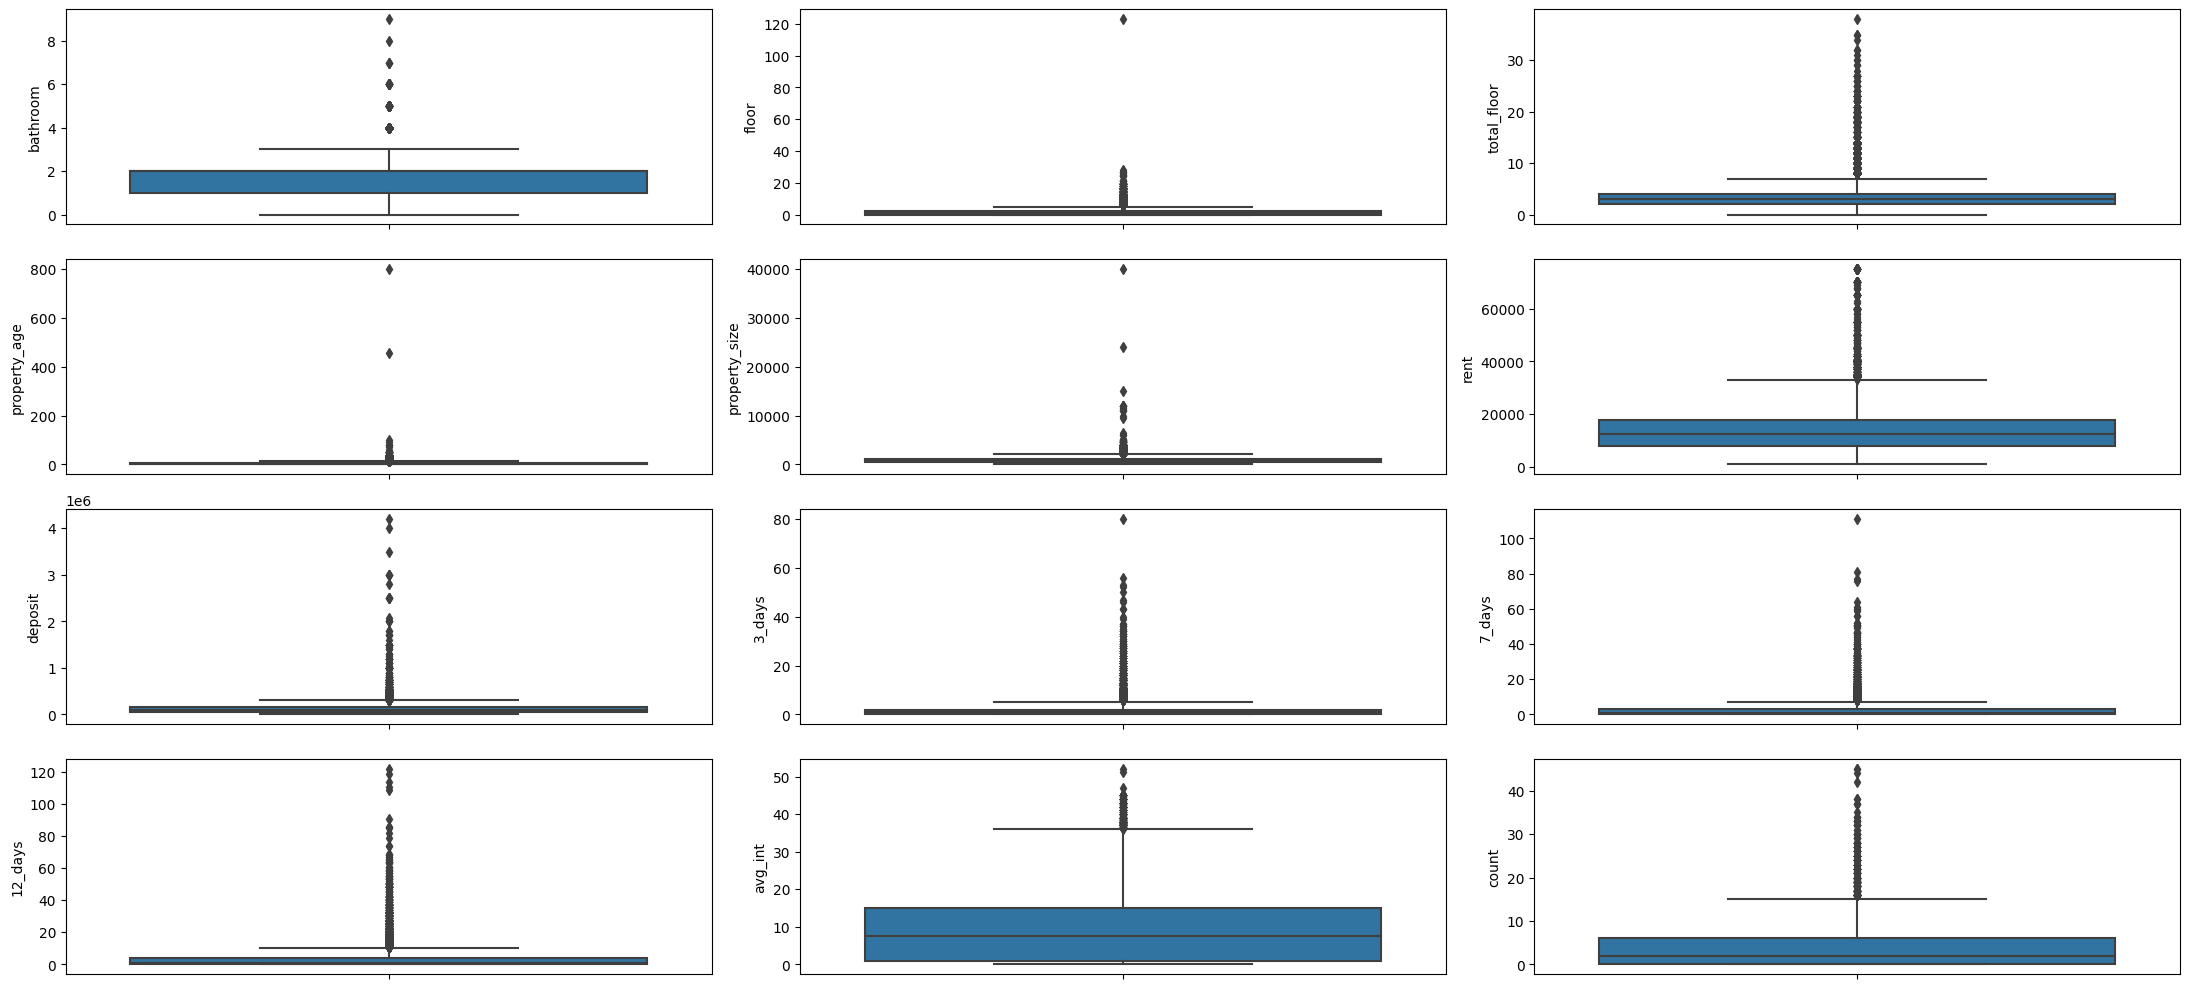

In [199]:
nrows = 4
ncols = 3
fig,axes = plt.subplots(nrows=nrows , ncols=ncols, figsize=(22,10))
sub =[(i,j) for i in range(nrows) for j in range(ncols)]


for j,i in enumerate(num_cols):
    ax = axes[sub[j][0],sub[j][1]]
    sns.boxplot(data=df_final,y=i,ax=ax)
fig.tight_layout()   
plt.show()


bathroom            Axes(0.125,0.11;0.0545775x0.77)
floor            Axes(0.190493,0.11;0.0545775x0.77)
total_floor      Axes(0.255986,0.11;0.0545775x0.77)
property_age     Axes(0.321479,0.11;0.0545775x0.77)
property_size    Axes(0.386972,0.11;0.0545775x0.77)
rent             Axes(0.452465,0.11;0.0545775x0.77)
deposit          Axes(0.517958,0.11;0.0545775x0.77)
3_days           Axes(0.583451,0.11;0.0545775x0.77)
7_days           Axes(0.648944,0.11;0.0545775x0.77)
12_days          Axes(0.714437,0.11;0.0545775x0.77)
avg_int           Axes(0.77993,0.11;0.0545775x0.77)
count            Axes(0.845423,0.11;0.0545775x0.77)
dtype: object

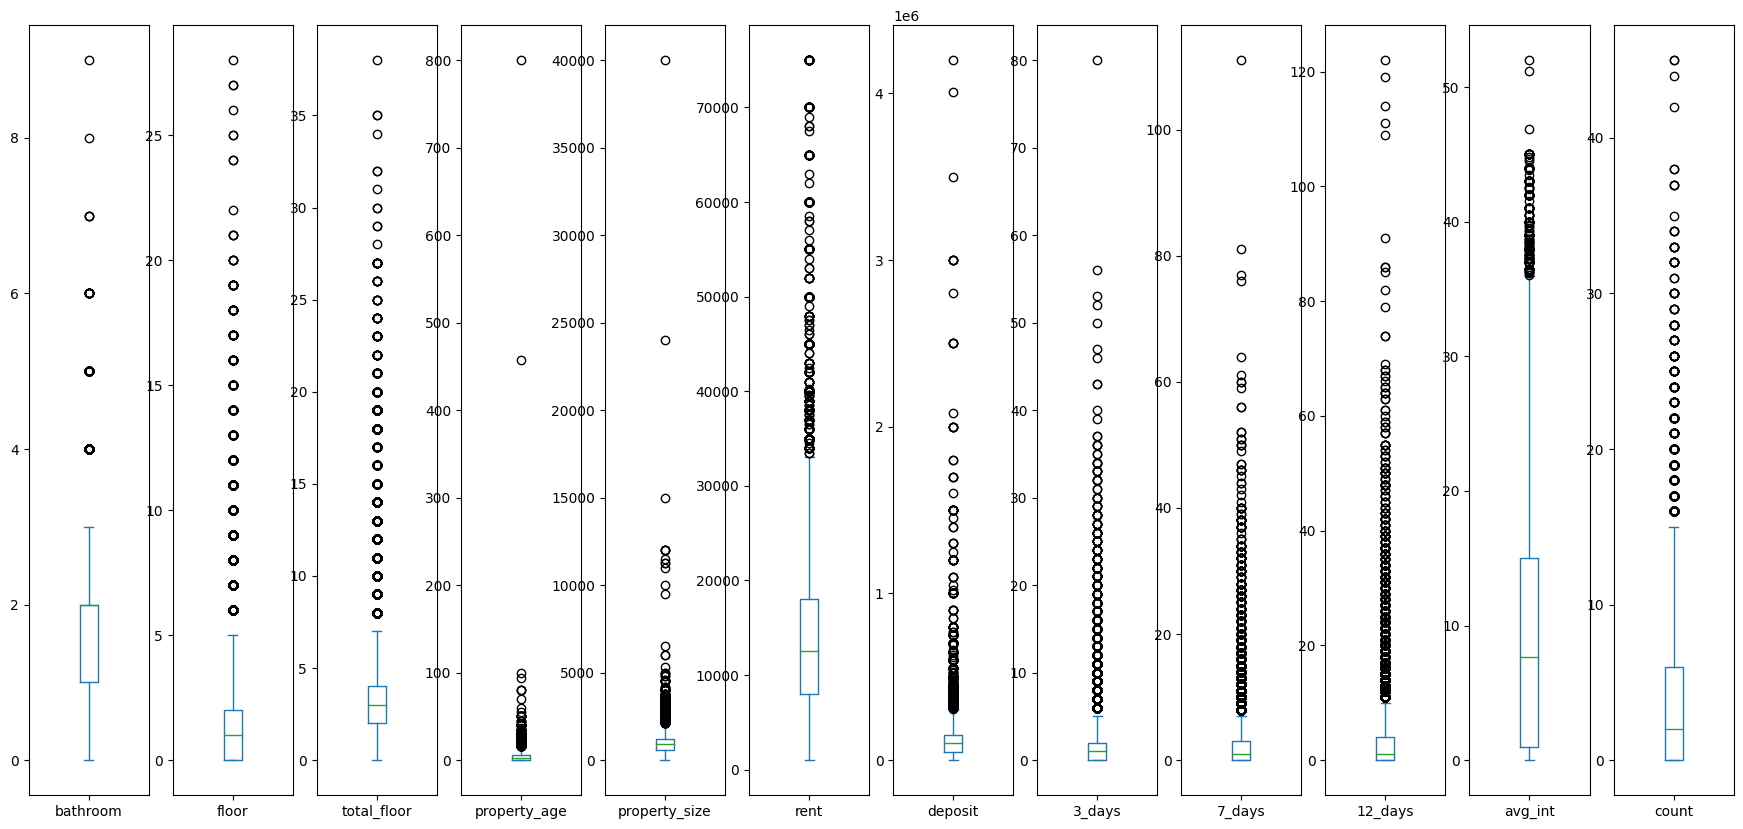

In [204]:
df_final[num_cols].plot(kind='box',subplots=True,  sharex=False, sharey=False,figsize=(22,10))

In [202]:
# Dropping as it is only one record
index = df_final[df_final['floor'] > 40].index
df_final.drop(index,inplace=True)

In [205]:
# Dropping as these are only 6 record
index = df_final[df_final['bathroom']>9].index
print(index)
df_final.drop(index,inplace=True)

Index([], dtype='int64')


In [206]:
df_final[df_final['property_age'] > 100]

,type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,3_days,7_days,12_days,avg_int,count
16455,BHK2,1,0,2.0,SEMI_FURNISHED,0,ANYONE,0,TWO_WHEELER,800,800,0,14000,140000,IF,3.0,4.0,7.0,4.428571,0
21871,BHK4,4,2,4.0,SEMI_FURNISHED,0,FAMILY,0,BOTH,457,2850,0,70000,700000,AP,0.0,1.0,2.0,5.500000,1


In [212]:
index = df_final[df_final['property_size'] > 5000].index
df_final.drop(index,inplace= True)

In [203]:
len(df_final)

28881

bathroom            Axes(0.125,0.11;0.0545775x0.77)
floor            Axes(0.190493,0.11;0.0545775x0.77)
total_floor      Axes(0.255986,0.11;0.0545775x0.77)
property_age     Axes(0.321479,0.11;0.0545775x0.77)
property_size    Axes(0.386972,0.11;0.0545775x0.77)
rent             Axes(0.452465,0.11;0.0545775x0.77)
deposit          Axes(0.517958,0.11;0.0545775x0.77)
3_days           Axes(0.583451,0.11;0.0545775x0.77)
7_days           Axes(0.648944,0.11;0.0545775x0.77)
12_days          Axes(0.714437,0.11;0.0545775x0.77)
avg_int           Axes(0.77993,0.11;0.0545775x0.77)
count            Axes(0.845423,0.11;0.0545775x0.77)
dtype: object

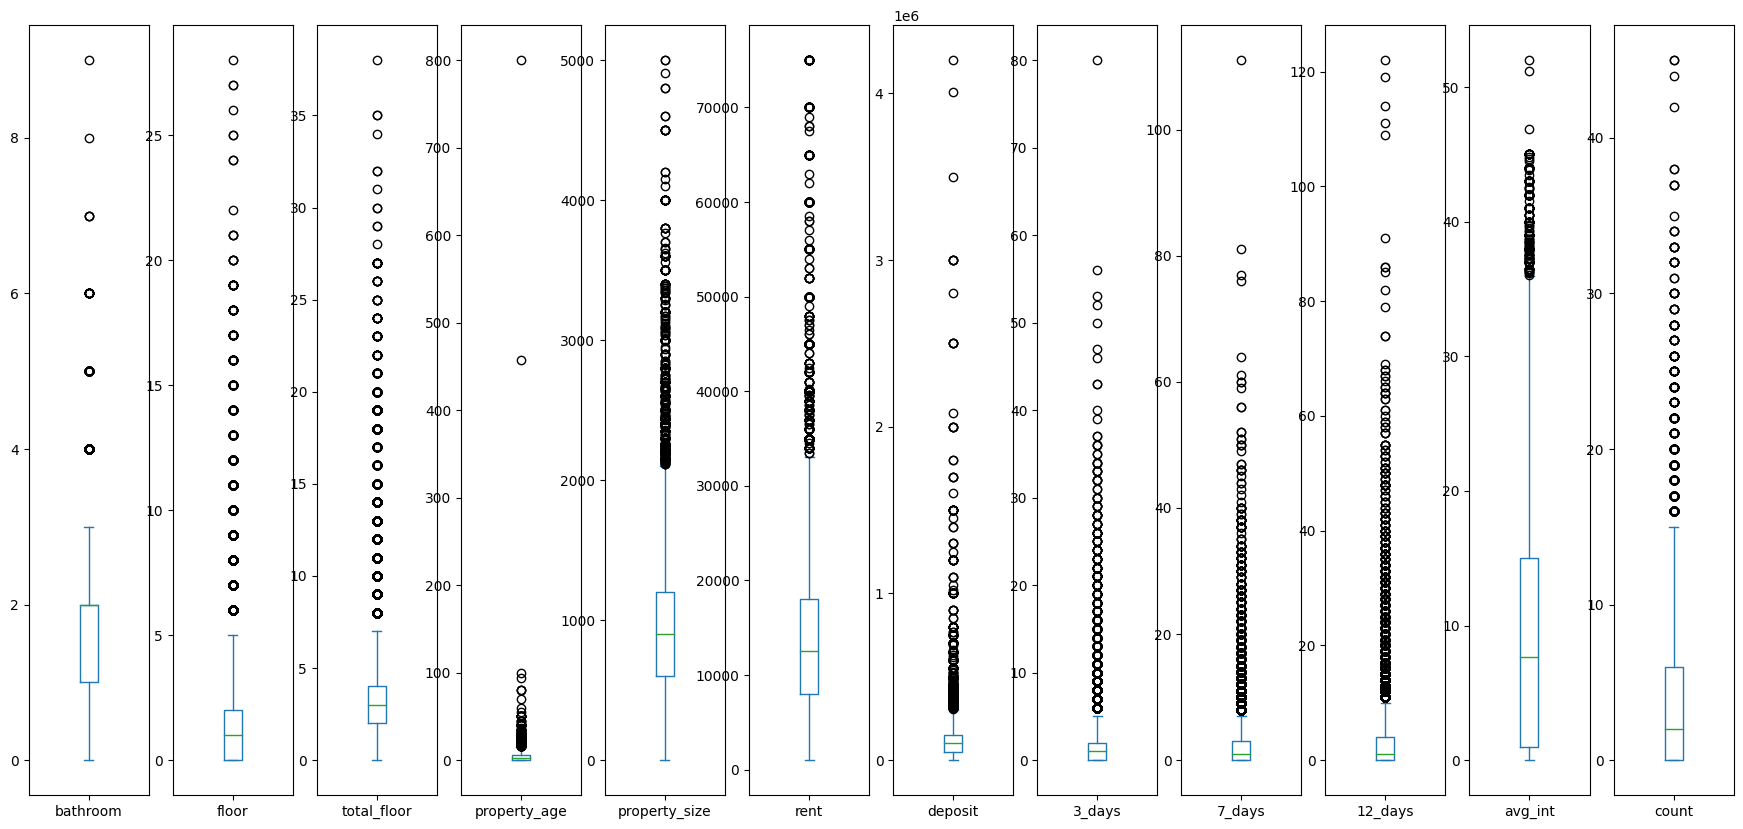

In [213]:
df_final[num_cols].plot(kind='box',subplots=True,  sharex=False, sharey=False,figsize=(22,10))

In [283]:
df_final.head()

,type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,3_days,7_days,12_days,avg_int,count
0,BHK2,1,3,4.0,SEMI_FURNISHED,1,FAMILY,1,BOTH,2,850,1,12000,120000,AP,4.0,4.0,4.0,1.000000,7
1,BHK2,2,4,11.0,SEMI_FURNISHED,1,FAMILY,1,BOTH,1,1233,1,20000,150000,AP,4.0,5.0,8.0,11.250000,0
2,BHK2,2,0,4.0,NOT_FURNISHED,1,ANYONE,1,FOUR_WHEELER,0,1200,0,15000,75000,AP,18.0,22.0,27.0,2.888889,12
3,BHK3,2,3,4.0,SEMI_FURNISHED,0,ANYONE,0,BOTH,1,1300,0,17000,150000,AP,5.0,7.0,10.0,10.461538,9
4,BHK1,1,1,2.0,SEMI_FURNISHED,0,ANYONE,0,BOTH,4,450,0,6500,40000,IF,34.0,52.0,68.0,3.955882,7


In [284]:
len(df_final.columns)

20

In [285]:
df_model = pd.get_dummies(df_final, columns =cat_cols,dtype=float)

In [286]:
x_cols = []
for i in df_model.columns:
    if i not in ['3_days', '7_days','12_days', 'avg_int']:
        x_cols.append(i)


print(x_cols)

['bathroom', 'floor', 'total_floor', 'gym', 'lift', 'property_age', 'property_size', 'swimming_pool', 'rent', 'deposit', 'count', 'type_BHK1', 'type_BHK2', 'type_BHK3', 'type_BHK4', 'type_BHK4PLUS', 'type_RK1', 'furnishing_FULLY_FURNISHED', 'furnishing_NOT_FURNISHED', 'furnishing_SEMI_FURNISHED', 'lease_type_ANYONE', 'lease_type_BACHELOR', 'lease_type_COMPANY', 'lease_type_FAMILY', 'parking_BOTH', 'parking_FOUR_WHEELER', 'parking_NONE', 'parking_TWO_WHEELER', 'building_type_AP', 'building_type_IF', 'building_type_IH']


In [287]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_transformed = pd.DataFrame(sc.fit_transform(df_model[num_cols]), columns=num_cols)




In [288]:
print(x_transformed)

       bathroom     floor  total_floor  property_age  property_size      rent  \
0     -1.059741  0.540523     0.142805     -0.319151      -0.212451 -0.268362   
1      0.277397  0.984572     2.223960     -0.453178       0.531216  0.615235   
2      0.277397 -0.791623     0.142805     -0.587205       0.467140  0.062987   
3      0.277397  0.540523     0.142805     -0.453178       0.661309  0.283886   
4     -1.059741 -0.347575    -0.451811     -0.051096      -0.989127 -0.875835   
...         ...       ...          ...           ...            ...       ...   
28859 -1.059741 -0.791623    -0.451811      1.423205       0.467140  0.946584   
28860  0.277397  0.540523    -0.154503      0.485013       0.680726  0.836135   
28861  0.277397  1.872669     3.115884     -0.587205       0.030260 -0.213137   
28862 -1.059741 -0.347575    -0.451811      0.082931      -0.697873 -0.047463   
28863  0.277397 -0.791623     0.142805     -0.453178       1.146731  1.057034   

        deposit     count  

In [289]:
y = ['3_days','7_days','12_days','avg_int']
for i in y:
    num_cols.remove(i)#['3_days','7_days','12_days','avg_int'])

ValueError: list.remove(x): x not in list

In [290]:
num_cols

['bathroom',
 'floor',
 'total_floor',
 'property_age',
 'property_size',
 'rent',
 'deposit',
 'count']

In [291]:
len(df_model)

28864

In [292]:
len(x_transformed)

28864

In [ ]:
# Fitting the model

In [293]:
num_cols

['bathroom',
 'floor',
 'total_floor',
 'property_age',
 'property_size',
 'rent',
 'deposit',
 'count']

In [294]:
df_model = df_model.reset_index()
df_model.drop(columns=['index'],inplace=True)

In [297]:
df_model.drop(columns=num_cols, inplace =True)

In [298]:
df_proc = pd.concat((df_model,x_transformed), axis=1)

In [299]:
df_proc

,gym,lift,swimming_pool,3_days,7_days,12_days,avg_int,type_BHK1,type_BHK2,type_BHK3,...,building_type_IF,building_type_IH,bathroom,floor,total_floor,property_age,property_size,rent,deposit,count
0,1,1,1,4.0,4.0,4.0,1.000000,0.0,1.0,0.0,...,0.0,0.0,-1.059741,0.540523,0.142805,-0.319151,-0.212451,-0.268362,-0.026448,0.836118
1,1,1,1,4.0,5.0,8.0,11.250000,0.0,1.0,0.0,...,0.0,0.0,0.277397,0.984572,2.223960,-0.453178,0.531216,0.615235,0.212541,-0.818203
2,1,1,0,18.0,22.0,27.0,2.888889,0.0,1.0,0.0,...,0.0,0.0,0.277397,-0.791623,0.142805,-0.587205,0.467140,0.062987,-0.384932,2.017776
3,0,0,0,5.0,7.0,10.0,10.461538,0.0,0.0,1.0,...,0.0,0.0,0.277397,0.540523,0.142805,-0.453178,0.661309,0.283886,0.212541,1.308781
4,0,0,0,34.0,52.0,68.0,3.955882,1.0,0.0,0.0,...,1.0,0.0,-1.059741,-0.347575,-0.451811,-0.051096,-0.989127,-0.875835,-0.663753,0.836118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28859,0,0,0,6.0,8.0,10.0,3.400000,0.0,1.0,0.0,...,1.0,0.0,-1.059741,-0.791623,-0.451811,1.423205,0.467140,0.946584,0.610857,-0.818203
28860,0,1,0,3.0,3.0,3.0,2.000000,0.0,0.0,1.0,...,0.0,0.0,0.277397,0.540523,-0.154503,0.485013,0.680726,0.836135,0.013384,0.836118
28861,1,1,1,0.0,2.0,2.0,5.000000,0.0,1.0,0.0,...,0.0,0.0,0.277397,1.872669,3.115884,-0.587205,0.030260,-0.213137,-0.584090,0.599786
28862,0,0,0,2.0,2.0,5.0,5.200000,0.0,1.0,0.0,...,1.0,0.0,-1.059741,-0.347575,-0.451811,0.082931,-0.697873,-0.047463,-0.345100,-0.818203


In [300]:
x_cols = []
y_cols = ['3_days', '7_days','12_days', 'avg_int']

for i in df_proc.columns:
    if i not in y_cols:
        x_cols.append(i)


In [301]:
x_cols

['gym',
 'lift',
 'swimming_pool',
 'type_BHK1',
 'type_BHK2',
 'type_BHK3',
 'type_BHK4',
 'type_BHK4PLUS',
 'type_RK1',
 'furnishing_FULLY_FURNISHED',
 'furnishing_NOT_FURNISHED',
 'furnishing_SEMI_FURNISHED',
 'lease_type_ANYONE',
 'lease_type_BACHELOR',
 'lease_type_COMPANY',
 'lease_type_FAMILY',
 'parking_BOTH',
 'parking_FOUR_WHEELER',
 'parking_NONE',
 'parking_TWO_WHEELER',
 'building_type_AP',
 'building_type_IF',
 'building_type_IH',
 'bathroom',
 'floor',
 'total_floor',
 'property_age',
 'property_size',
 'rent',
 'deposit',
 'count']

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df_proc.dropna(inplace=True)

In [310]:
X_train, X_test, y_train,y_test =  train_test_split(df_proc[x_cols],df_proc['3_days'])


In [311]:

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test,y_pred))
print(rms)


3.0410437223160884


In [263]:
# X_train, X_test, y_train,y_test =  train_test_split(df_proc[x_cols],df_proc['7_days'])
# model = LinearRegression()
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# rms = np.sqrt(mean_squared_error(y_test,y_pred))
# print(rms)

4.231569951646827


In [312]:
X_test

,gym,lift,swimming_pool,type_BHK1,type_BHK2,type_BHK3,type_BHK4,type_BHK4PLUS,type_RK1,furnishing_FULLY_FURNISHED,...,building_type_IF,building_type_IH,bathroom,floor,total_floor,property_age,property_size,rent,deposit,count
20156,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.277397,0.540523,-0.154503,0.082931,-0.309536,-0.157913,-0.504427,-0.109208
1569,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.277397,-0.347575,-0.154503,-0.587205,-0.115367,0.062987,-0.185774,0.127123
11975,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,-1.059741,0.096474,-0.451811,1.423205,-1.280380,-0.820611,-0.663753,-0.818203
20654,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.277397,-0.347575,0.142805,-0.587205,-0.115367,-0.931060,-0.886810,-0.818203
23904,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-1.059741,-0.347575,-0.451811,0.082931,-0.309536,-0.268362,-0.584090,-0.818203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.277397,0.540523,-0.154503,-0.453178,-0.212451,-0.489262,-0.384932,-0.581872
27392,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.277397,-0.791623,-0.451811,-0.185123,-0.309536,-0.489262,-0.185774,-0.818203
12704,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.614534,-0.791623,-0.749118,-0.587205,0.467140,-1.041510,-0.823079,1.545113
7223,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-1.059741,-0.347575,-0.154503,0.082931,-0.892042,-0.765386,-0.584090,-0.818203


In [277]:
x_cols

['gym',
 'lift',
 'swimming_pool',
 'type_BHK1',
 'type_BHK2',
 'type_BHK3',
 'type_BHK4',
 'type_BHK4PLUS',
 'type_RK1',
 'furnishing_FULLY_FURNISHED',
 'furnishing_NOT_FURNISHED',
 'furnishing_SEMI_FURNISHED',
 'lease_type_ANYONE',
 'lease_type_BACHELOR',
 'lease_type_COMPANY',
 'lease_type_FAMILY',
 'parking_BOTH',
 'parking_FOUR_WHEELER',
 'parking_NONE',
 'parking_TWO_WHEELER',
 'building_type_AP',
 'building_type_IF',
 'building_type_IH']

In [313]:
X_train, X_test, y_train,y_test =  train_test_split(df_proc[x_cols],df_proc['3_days'])
model = PoissonRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test,y_pred))
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))
print(rms)

0.07866888791903182
0.07953584414109116
2.9865744026435315


In [314]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb 
from sklearn.linear_model import Lasso, PoissonRegressor

seed = 42
# Try to make a model with these algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('xgb', xgb.XGBRegressor(random_state=seed)))
models.append(('Poisso',PoissonRegressor()))

results = []
names = []
for name, model in models:
    # model 
    regressor = model
    # fit model with train data
    regressor.fit(X_train, y_train)
    # predict after training 
    y_pred=regressor.predict(X_test)
    # calc. root mean squre error 
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    
    msg = "%s: RMS => (%f)" % (name, rms)
    print(msg)

LR: RMS => (2.951666)
LASSO: RMS => (3.062001)
KNN: RMS => (3.096260)
CART: RMS => (4.151607)
xgb: RMS => (2.948480)
Poisso: RMS => (2.986574)


In [271]:
y_test.mean()

1.5446230598669624